# Merge Datasets

### 1. Import Libraries and Datasets
### 2. Explore Dataframes
### 3. Merge Dataframes
### 4. Exploring New Dataframe with Visualizations

## 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# Ensures the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# path shortcut
path = r'C:\Users\kacee\OneDrive\Desktop\Project6'

In [5]:
# Importing Income data
df_inc = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Income_Cleaned.csv'), index_col = False)

In [6]:
# Importing House data
df_house = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'House_Cleaned.csv'), index_col = False)

In [7]:
# Importing House data
df_wage = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Wage_Cleaned.csv'), index_col = False)

## 2. Explore Dataframes

Income Data

In [8]:
df_inc.head()

,Unnamed: 0,Year,State,Income
0,0,2008,AL,44480.0
1,1,2008,AR,39590.0
2,2,2008,AZ,46910.0
3,3,2008,CA,57010.0
4,4,2008,CO,60940.0


In [9]:
df_inc.shape

(720, 4)

In [10]:
df_inc = df_inc.drop(columns =['Unnamed: 0'])

In [11]:
df_inc.head()

,Year,State,Income
0,2008,AL,44480.0
1,2008,AR,39590.0
2,2008,AZ,46910.0
3,2008,CA,57010.0
4,2008,CO,60940.0


In [12]:
df_inc.shape

(720, 3)

In [13]:
df_inc.describe()

,Year,Income
count,720.000000,720.000000
mean,2015.000000,58764.958333
std,4.323497,12614.490817
min,2008.000000,32340.000000
25%,2011.000000,49145.000000
50%,2015.000000,56970.000000
75%,2019.000000,66632.500000
max,2022.000000,108200.000000


In [18]:
df_inc.dtypes

Year        int64
State      object
Income    float64
dtype: object

House Data

In [14]:
df_house.head()

,Unnamed: 0,Year,State,House Cost
0,0,2008,AL,137250.036361
1,1,2008,AR,114877.181812
2,2,2008,AZ,201922.818171
3,3,2008,CA,336043.181811
4,4,2008,CO,230399.352287


In [15]:
df_house = df_house.drop(columns =['Unnamed: 0'])

In [16]:
df_house.shape

(720, 3)

In [17]:
df_house.describe()

,Year,House Cost
count,720.000000,720.000000
mean,2015.000000,199041.127708
std,4.323497,89123.701484
min,2008.000000,89833.333330
25%,2011.000000,137616.904549
50%,2015.000000,176275.312475
75%,2019.000000,233248.609378
max,2022.000000,777521.270825


Wage Data

In [18]:
df_wage.head()

,Unnamed: 0,Year,State,State_Minimum_Wage
0,0,2008,AL,5.85
1,1,2008,AR,6.25
2,2,2008,AZ,6.90
3,3,2008,CA,8.00
4,4,2008,CO,7.02


In [19]:
df_wage = df_wage.drop(columns =['Unnamed: 0'])

In [20]:
df_wage.shape

(720, 3)

In [21]:
df_wage.describe()

,Year,State_Minimum_Wage
count,720.000000,720.000000
mean,2015.000000,7.777194
std,4.323497,1.866411
min,2008.000000,2.000000
25%,2011.000000,7.250000
50%,2015.000000,7.250000
75%,2019.000000,8.250000
max,2022.000000,15.000000


## 2. Merge Dataframes

In [22]:
# First Merge df_inc and df_house
merged = pd.merge(df_house, df_inc, on=['Year', 'State'], indicator = True)
merged

,Year,State,House Cost,Income,_merge
0,2008,AL,137250.036361,44480.0,both
1,2008,AR,114877.181812,39590.0,both
2,2008,AZ,201922.818171,46910.0,both
3,2008,CA,336043.181811,57010.0,both
4,2008,CO,230399.352287,60940.0,both
...,...,...,...,...,...
715,2022,VA,319745.351833,85170.0,both
716,2022,WA,467987.500000,89430.0,both
717,2022,WI,223892.579371,73330.0,both
718,2022,WV,152927.083300,52460.0,both


In [23]:
# Check for value match
merged['_merge'].value_counts()

_merge
both          720
left_only       0
right_only      0
Name: count, dtype: int64

In [24]:
# drop _merge column, no longer necessary
merged = merged.drop(columns =['_merge'])
merged

,Year,State,House Cost,Income
0,2008,AL,137250.036361,44480.0
1,2008,AR,114877.181812,39590.0
2,2008,AZ,201922.818171,46910.0
3,2008,CA,336043.181811,57010.0
4,2008,CO,230399.352287,60940.0
...,...,...,...,...
715,2022,VA,319745.351833,85170.0
716,2022,WA,467987.500000,89430.0
717,2022,WI,223892.579371,73330.0
718,2022,WV,152927.083300,52460.0


In [25]:
merged2 = pd.merge(merged, df_wage, on=['Year', 'State'], indicator = True)
merged2

,Year,State,House Cost,Income,State_Minimum_Wage,_merge
0,2008,AL,137250.036361,44480.0,5.85,both
1,2008,AR,114877.181812,39590.0,6.25,both
2,2008,AZ,201922.818171,46910.0,6.90,both
3,2008,CA,336043.181811,57010.0,8.00,both
4,2008,CO,230399.352287,60940.0,7.02,both
...,...,...,...,...,...,...
715,2022,VA,319745.351833,85170.0,11.00,both
716,2022,WA,467987.500000,89430.0,14.49,both
717,2022,WI,223892.579371,73330.0,7.25,both
718,2022,WV,152927.083300,52460.0,7.25,both


In [26]:
# Check for value match
merged2['_merge'].value_counts()

_merge
both          720
left_only       0
right_only      0
Name: count, dtype: int64

In [27]:
merged2 = merged2.drop(columns =['_merge'])

In [28]:
merged2

,Year,State,House Cost,Income,State_Minimum_Wage
0,2008,AL,137250.036361,44480.0,5.85
1,2008,AR,114877.181812,39590.0,6.25
2,2008,AZ,201922.818171,46910.0,6.90
3,2008,CA,336043.181811,57010.0,8.00
4,2008,CO,230399.352287,60940.0,7.02
...,...,...,...,...,...
715,2022,VA,319745.351833,85170.0,11.00
716,2022,WA,467987.500000,89430.0,14.49
717,2022,WI,223892.579371,73330.0,7.25
718,2022,WV,152927.083300,52460.0,7.25


In [29]:
# Explore new columns
merged2.columns

Index(['Year', 'State', 'House Cost', 'Income', 'State_Minimum_Wage'], dtype='object')

In [30]:
# Explore new columns
merged2.dtypes

Year                    int64
State                  object
House Cost            float64
Income                float64
State_Minimum_Wage    float64
dtype: object

## 3. Exploring New Dataframe with Visualizations

Correlations

In [31]:
# Create subset without states
sub1 = merged2[['Year', 'House Cost', 'Income', 'State_Minimum_Wage']]

In [32]:
sub1

,Year,House Cost,Income,State_Minimum_Wage
0,2008,137250.036361,44480.0,5.85
1,2008,114877.181812,39590.0,6.25
2,2008,201922.818171,46910.0,6.90
3,2008,336043.181811,57010.0,8.00
4,2008,230399.352287,60940.0,7.02
...,...,...,...,...
715,2022,319745.351833,85170.0,11.00
716,2022,467987.500000,89430.0,14.49
717,2022,223892.579371,73330.0,7.25
718,2022,152927.083300,52460.0,7.25


In [33]:
# Correlation matrix using pandas
sub1.corr()

,Year,House Cost,Income,State_Minimum_Wage
Year,1.000000,0.438034,0.636881,0.490554
House Cost,0.438034,1.000000,0.685531,0.536248
Income,0.636881,0.685531,1.000000,0.576531
State_Minimum_Wage,0.490554,0.536248,0.576531,1.000000


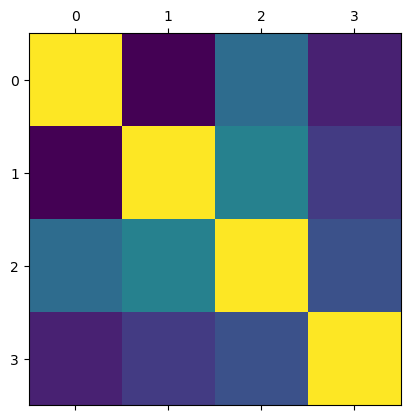

In [34]:
# Correlation heatmap using matplotlib
plt.matshow(sub1.corr())
plt.show()

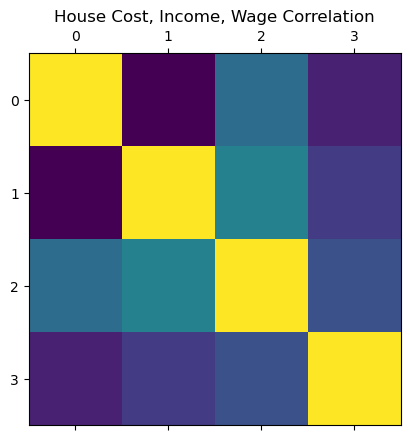

In [35]:
# Save figure to working directory
plt.matshow(sub1.corr())
plt.title('House Cost, Income, Wage Correlation')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'm_corr_merge1')) 

In [36]:
# Current dir
cwd = os.getcwd()
cwd

'C:\\Users\\kacee\\OneDrive\\Desktop\\Project6\\03 Scripts'

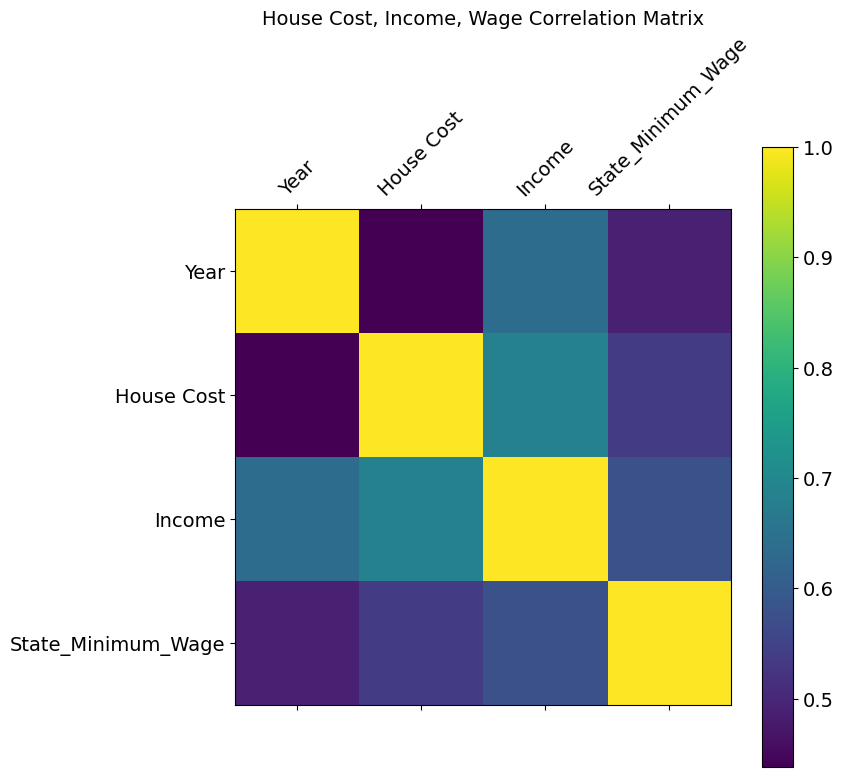

In [37]:
# Add labels, a legend, and change the size of the correlation Matrix
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub1.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub1.shape[1]), sub1.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub1.shape[1]), sub1.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('House Cost, Income, Wage Correlation Matrix', fontsize=14) # add title
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'm_corr_merge1_labeled1')) 

Heat Maps

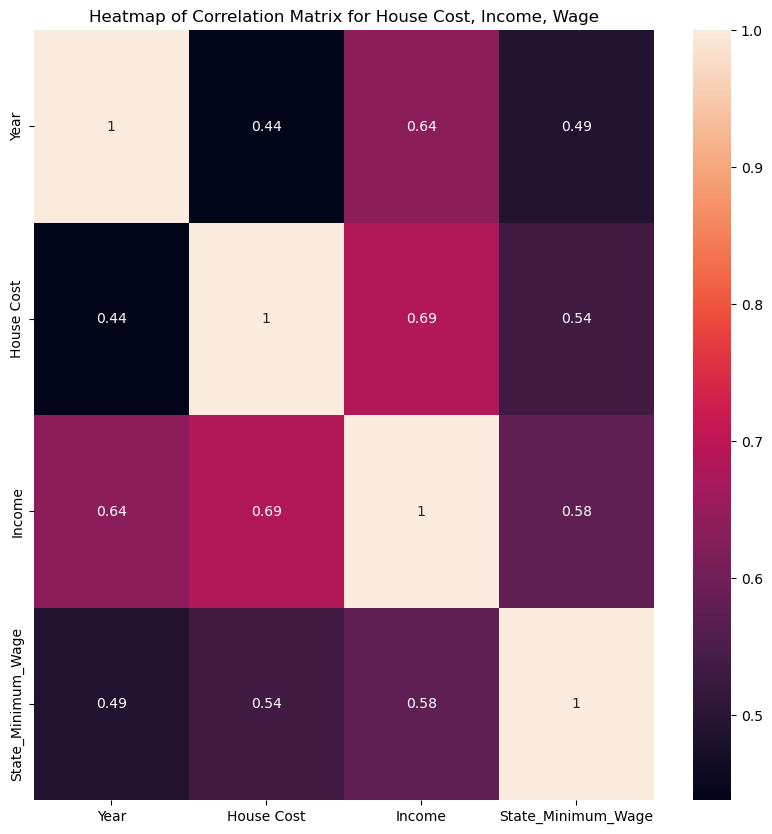

In [38]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub1.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
ax.set_title("Heatmap of Correlation Matrix for House Cost, Income, Wage")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'm_heat_merge1'))

Scatterplots

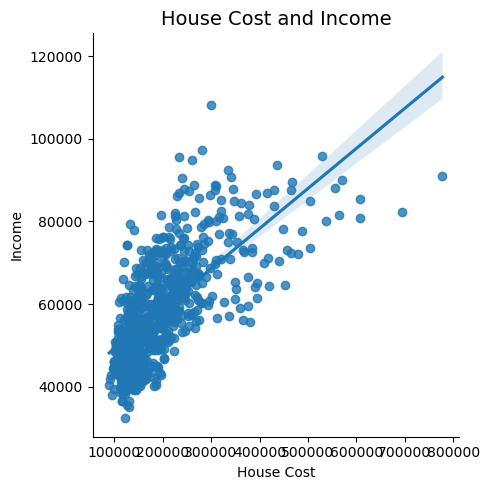

In [39]:
# Create a scatterplot for income vs house price
scatterHvI = sns.lmplot(x = 'House Cost', y = 'Income', data = merged2)
plt.title('House Cost and Income', fontsize=14) # add title
plt.tight_layout()  
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_HvI'))

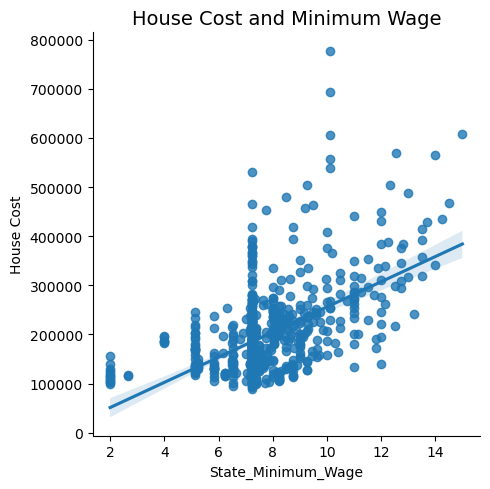

In [40]:
# Create a scatterplot for wage vs house price
scatterHvW = sns.lmplot(x = 'State_Minimum_Wage', y = 'House Cost', data = merged2)
plt.title('House Cost and Minimum Wage', fontsize=14) # add title
plt.tight_layout()  
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_HvW'))

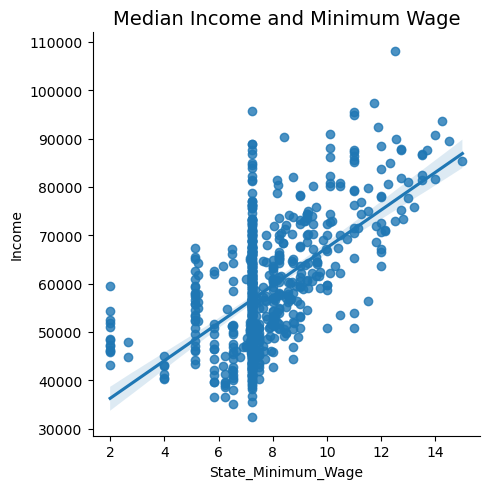

In [41]:
# Create a scatterplot for income vs wage
scatterIvW = sns.lmplot(x = 'State_Minimum_Wage', y = 'Income', data = merged2)
plt.title('Median Income and Minimum Wage', fontsize=14) # add title
plt.tight_layout()  
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_IvW'))

We notice that over time the average income rises and almost doubles from 2008-2022. That being said, the average house cost seems to rise quicker than the average outcome, and even more so than the minimum wage

Pair Plots

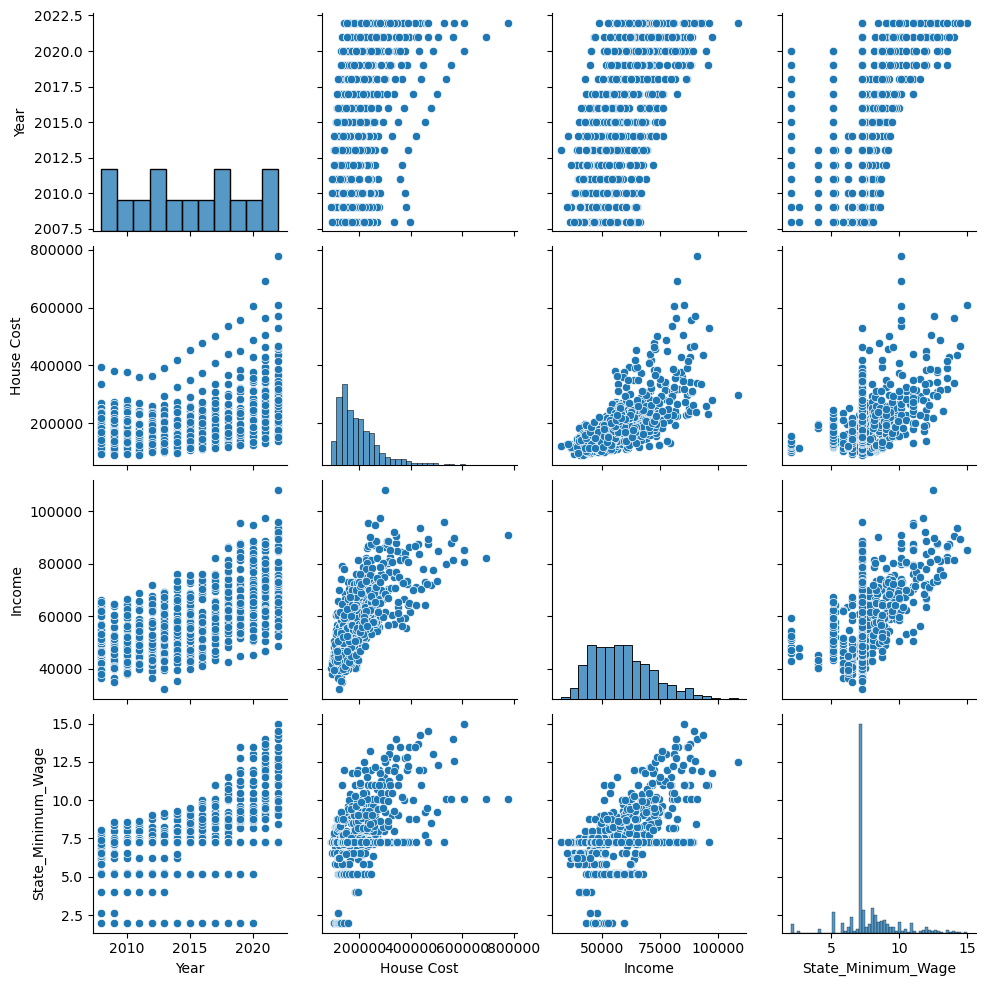

In [42]:
g = sns.pairplot(sub1)

Categorical Plots

In [42]:
# Make 4 categories for house cost
merged2.loc[merged2['House Cost'] < 1, 'House Category'] = 'No Data'
merged2.loc[(merged2['House Cost'] > 1) & (merged2['House Cost'] < 150000), 'House Category'] = 'Low Median Price'
merged2.loc[(merged2['House Cost'] >= 150000) & (merged2['House Cost'] < 300000), 'House Category'] = 'Middle Median Price'
merged2.loc[merged2['House Cost'] >= 300000, 'House Category'] = 'High Median Price'
merged2['House Category'].value_counts(dropna = False)

House Category
Middle Median Price    395
Low Median Price       251
High Median Price       74
Name: count, dtype: int64

In [43]:
merged2

,Year,State,House Cost,Income,State_Minimum_Wage,House Category
0,2008,AL,137250.036361,44480.0,5.85,Low Median Price
1,2008,AR,114877.181812,39590.0,6.25,Low Median Price
2,2008,AZ,201922.818171,46910.0,6.90,Middle Median Price
3,2008,CA,336043.181811,57010.0,8.00,High Median Price
4,2008,CO,230399.352287,60940.0,7.02,Middle Median Price
...,...,...,...,...,...,...
715,2022,VA,319745.351833,85170.0,11.00,High Median Price
716,2022,WA,467987.500000,89430.0,14.49,High Median Price
717,2022,WI,223892.579371,73330.0,7.25,Middle Median Price
718,2022,WV,152927.083300,52460.0,7.25,Middle Median Price


In [44]:
merged2.columns

Index(['Year', 'State', 'House Cost', 'Income', 'State_Minimum_Wage',
       'House Category'],
      dtype='object')

<Axes: xlabel='Income', ylabel='Count'>

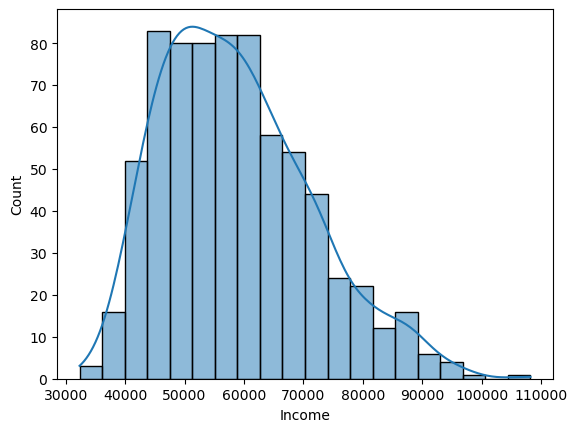

In [45]:
sns.histplot(merged2['Income'], bins = 20, kde = True)

In [46]:
# Make 4 categories for income
merged2.loc[merged2['Income'] < 1, 'Income Category'] = 'No Data'
merged2.loc[(merged2['Income'] > 1) & (merged2['Income'] < 55000), 'Income Category'] = 'Low Income'
merged2.loc[(merged2['Income'] >= 55000) & (merged2['Income'] < 80000), 'Income Category'] = 'Middle Income'
merged2.loc[merged2['Income'] >= 80000, 'Income Category'] = 'High Income'
merged2['Income Category'].value_counts(dropna = False)

Income Category
Middle Income    355
Low Income       312
High Income       53
Name: count, dtype: int64

In [47]:
merged2

,Year,State,House Cost,Income,State_Minimum_Wage,House Category,Income Category
0,2008,AL,137250.036361,44480.0,5.85,Low Median Price,Low Income
1,2008,AR,114877.181812,39590.0,6.25,Low Median Price,Low Income
2,2008,AZ,201922.818171,46910.0,6.90,Middle Median Price,Low Income
3,2008,CA,336043.181811,57010.0,8.00,High Median Price,Middle Income
4,2008,CO,230399.352287,60940.0,7.02,Middle Median Price,Middle Income
...,...,...,...,...,...,...,...
715,2022,VA,319745.351833,85170.0,11.00,High Median Price,High Income
716,2022,WA,467987.500000,89430.0,14.49,High Median Price,High Income
717,2022,WI,223892.579371,73330.0,7.25,Middle Median Price,Middle Income
718,2022,WV,152927.083300,52460.0,7.25,Middle Median Price,Low Income


In [48]:
merged2.columns

Index(['Year', 'State', 'House Cost', 'Income', 'State_Minimum_Wage',
       'House Category', 'Income Category'],
      dtype='object')

Now that groupings have been made, we can explore the visual correlation.

In [49]:
# Define color palette
palette = {'No Data': 'maroon', 'Low Median Price': 'gold', 'Middle Median Price': 'mediumseagreen', 'High Median Price': 'midnightblue'}

In [50]:
# Define color palette
palette2 = {'No Data': 'maroon', 'Low Income': 'gold', 'Middle Income': 'mediumseagreen', 'High Income': 'midnightblue'}

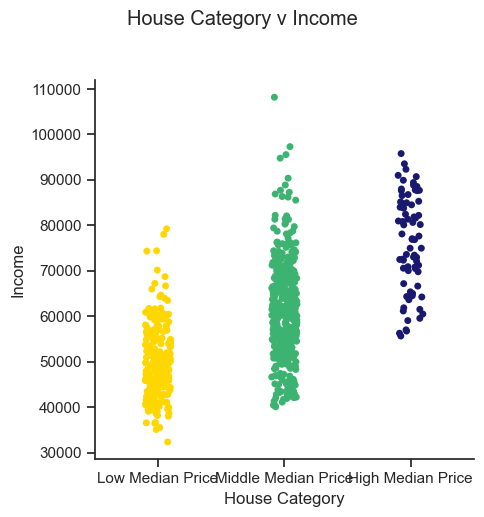

In [51]:
# Create a categorical plot in seaborn
sns.set(style="ticks")
g = sns.catplot(x="House Category", y="Income", hue="House Category", data=merged2, palette=palette)
g.fig.suptitle("House Category v Income", y=1.03)
plt.tight_layout()  
g.savefig("HvI_scatter.png")

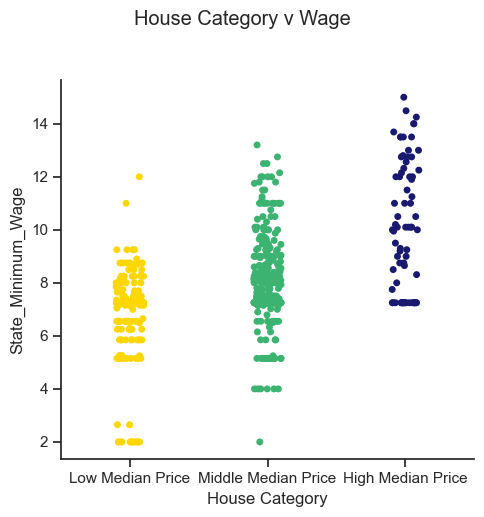

In [52]:
# Create a categorical plot in seaborn
sns.set(style="ticks")
g = sns.catplot(x="House Category", y="State_Minimum_Wage", hue="House Category", data=merged2, palette=palette)
g.fig.suptitle("House Category v Wage", y=1.03)
plt.tight_layout()  
g.savefig("HvW_scatter.png")

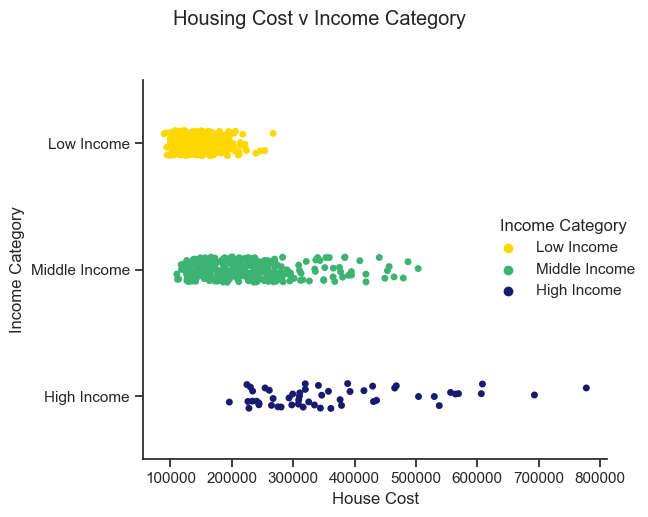

In [53]:
# Create a categorical plot in seaborn
sns.set(style="ticks")
g = sns.catplot(x="House Cost", y="Income Category", hue="Income Category", data=merged2, palette=palette2)
g.fig.suptitle("Housing Cost v Income Category", y=1.03)
plt.tight_layout()  
g.savefig("HvI2_scatter.png")

In [54]:
merged2.columns

Index(['Year', 'State', 'House Cost', 'Income', 'State_Minimum_Wage',
       'House Category', 'Income Category'],
      dtype='object')

In [55]:
# Export Merged Dataset
merged2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Merged_3_Data.csv'))

## Previous Questions:

• Are there better sources for median house price? Ones that are more comprehensive?

• How do the median house prices and median household incomes compare over the years?

• Should we find information on general cost of living instead of house prices?

• Is Zillow a reliable source for house prices?

• How have house prices affected living status? Do more people live together to split up cost? Are 
families having less children?

The question answered in this exercise was how the median house prices and median household incomes compare over the years. This data should be used to formulate percentage of income spent on housing instead of straightforward numbers.

### Hypothesis:

The average cost of houses in the US has increased at a greater rate than the average household income from 2008-2022.